In [50]:
#very cool notebook to mess around and try things until we get a working baseline

In [51]:
#imports, add more as needed
import os

import numpy as np

import sklearn as skl

from sklearn import model_selection

from sklearn import datasets

from sklearn import linear_model

from sklearn import metrics

import tensorflow as tf

from matplotlib import pyplot as plt

from geopy.geocoders import Nominatim

from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.losses import CategoricalCrossentropy

from tensorflow.keras.activations import softmax

from tensorflow.keras.optimizers import Adam

from random import randint


In [52]:
#initiate nominatim geolocator

geolocator = Nominatim(user_agent="geoapiExercises")


In [53]:
#data loading

X_data = np.loadtxt(os.path.join('data', 'default_plus_chromatic_features_1059_tracks.txt'), delimiter=',')
Y_data = np.loadtxt(os.path.join('data', 'Y_encoding.txt'), delimiter=',')
X = X_data[:, :116]
y = Y_data

In [54]:
#translating longitude and latitude to country labels
''''Y_labels = []

y_unique = np.unique(y, axis=0)
#print(y_unique)

for point in range(0, y_unique.shape[0]):
    latitude = y_unique[point,0]
    longitude = y_unique[point,1]

    location = geolocator.reverse((latitude, longitude))
    
    
    Y_labels.append(location.raw['address']['country_code'])

print(Y_labels) '''


"'Y_labels = []\n\ny_unique = np.unique(y, axis=0)\n#print(y_unique)\n\nfor point in range(0, y_unique.shape[0]):\n    latitude = y_unique[point,0]\n    longitude = y_unique[point,1]\n\n    location = geolocator.reverse((latitude, longitude))\n    \n    \n    Y_labels.append(location.raw['address']['country_code'])\n\nprint(Y_labels) "

In [55]:
#create one-hot encoded y matrix
'''num_labels = 33

Y_matrix = np.zeros((y.shape[0], num_labels))

for point in range(0, y.shape[0]):
    loc = np.where(y_unique == y[point, 0])[0]
    Y_matrix[point, loc] = 1'''



'num_labels = 33\n\nY_matrix = np.zeros((y.shape[0], num_labels))\n\nfor point in range(0, y.shape[0]):\n    loc = np.where(y_unique == y[point, 0])[0]\n    Y_matrix[point, loc] = 1'

In [56]:
#writing one-hot encoded matrix to new data file for ease of use
'''np.savetxt('Y_encoding.txt', Y_matrix, delimiter=',')'''


"np.savetxt('Y_encoding.txt', Y_matrix, delimiter=',')"

In [57]:
#splitting data into train, cv, test

split = skl.model_selection.train_test_split(X, y)

train_x = split[0]
train_y = split[2]

cv_split = skl.model_selection.train_test_split(split[1], split[3])

cv_x = cv_split[0]

cv_y = cv_split[2]

test_x = cv_split[1]

test_y = cv_split[3]

In [58]:
#One v. all logitistic regression for accuracy testing

regression_model = Sequential([
    Dense(units=33, activation ='linear')
    
])

regression_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss=CategoricalCrossentropy(from_logits=True))

print(train_x.shape)

print(train_y.shape)

regression_model.fit(train_x, train_y, epochs=2200)

logits = regression_model(train_x)

prediction = tf.nn.softmax(logits)

(794, 116)
(794, 33)
Epoch 1/2200
25/25 [==============================] - 1s 3ms/step - loss: 4.4467
Epoch 2/2200
25/25 [==============================] - 0s 3ms/step - loss: 4.0110
Epoch 3/2200
25/25 [==============================] - 0s 3ms/step - loss: 3.7774
Epoch 4/2200
25/25 [==============================] - 0s 3ms/step - loss: 3.6027
Epoch 5/2200
25/25 [==============================] - 0s 3ms/step - loss: 3.4593
Epoch 6/2200
25/25 [==============================] - 0s 3ms/step - loss: 3.3410
Epoch 7/2200
25/25 [==============================] - 0s 3ms/step - loss: 3.2354
Epoch 8/2200
25/25 [==============================] - 0s 3ms/step - loss: 3.1438
Epoch 9/2200
25/25 [==============================] - 0s 3ms/step - loss: 3.0659
Epoch 10/2200
25/25 [==============================] - 0s 3ms/step - loss: 2.9894
Epoch 11/2200
25/25 [==============================] - 0s 3ms/step - loss: 2.9231
Epoch 12/2200
25/25 [==============================] - 0s 3ms/step - loss: 2.8622
Epoc

25/25 [==============================] - 0s 2ms/step - loss: 1.5394
Epoch 101/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.5334
Epoch 102/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.5290
Epoch 103/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.5247
Epoch 104/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.5198
Epoch 105/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.5151
Epoch 106/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.5096
Epoch 107/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.5046
Epoch 108/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.5015
Epoch 109/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.4987
Epoch 110/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.4937
Epoch 111/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.4889
Epoch 112/2200
25/2

25/25 [==============================] - 0s 3ms/step - loss: 1.2440
Epoch 199/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2403
Epoch 200/2200
25/25 [==============================] - 0s 4ms/step - loss: 1.2381
Epoch 201/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2355
Epoch 202/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2340
Epoch 203/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2338
Epoch 204/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2327
Epoch 205/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2327
Epoch 206/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2282
Epoch 207/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2249
Epoch 208/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2233
Epoch 209/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2233
Epoch 210/2200
25/2

25/25 [==============================] - 0s 2ms/step - loss: 1.2177
Epoch 1541/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.2149
Epoch 1542/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.2169
Epoch 1543/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.2171
Epoch 1544/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.2156
Epoch 1545/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.2171
Epoch 1546/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.2188
Epoch 1547/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.2186
Epoch 1548/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.2184
Epoch 1549/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.2193
Epoch 1550/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.2202
Epoch 1551/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.2195
Epoch 15

25/25 [==============================] - 0s 3ms/step - loss: 1.2491
Epoch 1638/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2479
Epoch 1639/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2483
Epoch 1640/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.2490
Epoch 1641/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.2503
Epoch 1642/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.2497
Epoch 1643/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.2496
Epoch 1644/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2515
Epoch 1645/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.2525
Epoch 1646/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.2496
Epoch 1647/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.2515
Epoch 1648/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.2533
Epoch 16

25/25 [==============================] - 0s 3ms/step - loss: 1.2819
Epoch 1735/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2822
Epoch 1736/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2827
Epoch 1737/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2845
Epoch 1738/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2838
Epoch 1739/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2832
Epoch 1740/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2835
Epoch 1741/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.2839
Epoch 1742/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2845
Epoch 1743/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2838
Epoch 1744/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2863
Epoch 1745/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.2869
Epoch 17

25/25 [==============================] - 0s 3ms/step - loss: 1.3162
Epoch 1832/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3172
Epoch 1833/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3166
Epoch 1834/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3164
Epoch 1835/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3183
Epoch 1836/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3173
Epoch 1837/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3144
Epoch 1838/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3157
Epoch 1839/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3175
Epoch 1840/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3207
Epoch 1841/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3177
Epoch 1842/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3192
Epoch 18

25/25 [==============================] - 0s 3ms/step - loss: 1.3503
Epoch 1929/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3511
Epoch 1930/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3504
Epoch 1931/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3506
Epoch 1932/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3506
Epoch 1933/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3503
Epoch 1934/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3519
Epoch 1935/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3523
Epoch 1936/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3542
Epoch 1937/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3521
Epoch 1938/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3529
Epoch 1939/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3542
Epoch 19

25/25 [==============================] - 0s 3ms/step - loss: 1.3831
Epoch 2026/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3839
Epoch 2027/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3837
Epoch 2028/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3853
Epoch 2029/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.3853
Epoch 2030/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3872
Epoch 2031/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.3870
Epoch 2032/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.3857
Epoch 2033/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3897
Epoch 2034/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3886
Epoch 2035/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.3858
Epoch 2036/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.3865
Epoch 20

25/25 [==============================] - 0s 3ms/step - loss: 1.4185
Epoch 2123/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.4172
Epoch 2124/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.4197
Epoch 2125/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.4197
Epoch 2126/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.4187
Epoch 2127/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.4196
Epoch 2128/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.4230
Epoch 2129/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.4217
Epoch 2130/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.4198
Epoch 2131/2200
25/25 [==============================] - 0s 2ms/step - loss: 1.4196
Epoch 2132/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.4205
Epoch 2133/2200
25/25 [==============================] - 0s 3ms/step - loss: 1.4211
Epoch 21

In [59]:
p = np.argmax(prediction, axis=1)
predict_matrix = np.zeros(train_y.shape)
for r in range(prediction.shape[0]):
    predict_matrix[r, p[r]] = 1;

    
print(predict_matrix)
    

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [60]:
#neural network model

nn_model = Sequential([
    Dense(units=128, activation = 'relu'),
    Dense(units=64, activation = 'relu'),
    Dense(units=33, activation ='relu')
    
])


lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    1e-3,
    decay_steps=10000,
    decay_rate=0.55,
    staircase=False)

nn_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),loss=CategoricalCrossentropy(from_logits=True))

print(train_x.shape)

print(train_y.shape)

nn_model.fit(train_x, train_y, epochs=2000)

logits = nn_model(train_x)

nn_prediction = tf.nn.softmax(logits)


(794, 116)
(794, 33)
Epoch 1/2000
25/25 [==============================] - 1s 3ms/step - loss: 4.0987
Epoch 2/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.0879
Epoch 3/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.0776
Epoch 4/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.0675
Epoch 5/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.0575
Epoch 6/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.0476
Epoch 7/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.0381
Epoch 8/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.0290
Epoch 9/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.0201
Epoch 10/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.0115
Epoch 11/2000
25/25 [==============================] - 0s 3ms/step - loss: 4.0034
Epoch 12/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.9955
Epoc

25/25 [==============================] - 0s 3ms/step - loss: 3.5683
Epoch 101/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.5646
Epoch 102/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.5611
Epoch 103/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.5576
Epoch 104/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.5541
Epoch 105/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.5507
Epoch 106/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.5472
Epoch 107/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.5438
Epoch 108/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.5405
Epoch 109/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.5370
Epoch 110/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.5337
Epoch 111/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.5304
Epoch 112/2000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 3.2987
Epoch 199/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.2963
Epoch 200/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.2941
Epoch 201/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.2920
Epoch 202/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.2899
Epoch 203/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.2877
Epoch 204/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.2856
Epoch 205/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.2836
Epoch 206/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.2813
Epoch 207/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.2792
Epoch 208/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.2771
Epoch 209/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.2749
Epoch 210/2000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 3.1044
Epoch 297/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.1022
Epoch 298/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.1003
Epoch 299/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.0987
Epoch 300/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.0966
Epoch 301/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.0947
Epoch 302/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.0925
Epoch 303/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.0908
Epoch 304/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.0889
Epoch 305/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.0868
Epoch 306/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.0849
Epoch 307/2000
25/25 [==============================] - 0s 3ms/step - loss: 3.0828
Epoch 308/2000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 2.9335
Epoch 395/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.9323
Epoch 396/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.9304
Epoch 397/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.9289
Epoch 398/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.9275
Epoch 399/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.9262
Epoch 400/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.9248
Epoch 401/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.9234
Epoch 402/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.9222
Epoch 403/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.9203
Epoch 404/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.9191
Epoch 405/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.9173
Epoch 406/2000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 2.8043
Epoch 493/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.8035
Epoch 494/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.8015
Epoch 495/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.8005
Epoch 496/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.7996
Epoch 497/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.7981
Epoch 498/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.7969
Epoch 499/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.7958
Epoch 500/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.7946
Epoch 501/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.7936
Epoch 502/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.7920
Epoch 503/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.7911
Epoch 504/2000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 2.7013
Epoch 591/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.7004
Epoch 592/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.7003
Epoch 593/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6988
Epoch 594/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6978
Epoch 595/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6974
Epoch 596/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6958
Epoch 597/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.6955
Epoch 598/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6948
Epoch 599/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6939
Epoch 600/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6928
Epoch 601/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6924
Epoch 602/2000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 2.6301
Epoch 689/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6291
Epoch 690/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6291
Epoch 691/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6281
Epoch 692/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6282
Epoch 693/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6270
Epoch 694/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6265
Epoch 695/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6258
Epoch 696/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6254
Epoch 697/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6246
Epoch 698/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6241
Epoch 699/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.6231
Epoch 700/2000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 2.5771
Epoch 787/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5760
Epoch 788/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5755
Epoch 789/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5746
Epoch 790/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5741
Epoch 791/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5733
Epoch 792/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5722
Epoch 793/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5717
Epoch 794/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5707
Epoch 795/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5703
Epoch 796/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5698
Epoch 797/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.5694
Epoch 798/2000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 2.5165
Epoch 885/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5155
Epoch 886/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5146
Epoch 887/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5154
Epoch 888/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5143
Epoch 889/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5136
Epoch 890/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5138
Epoch 891/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5126
Epoch 892/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5129
Epoch 893/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5118
Epoch 894/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5118
Epoch 895/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.5109
Epoch 896/2000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 2.4748
Epoch 983/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4739
Epoch 984/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4741
Epoch 985/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4744
Epoch 986/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4738
Epoch 987/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4730
Epoch 988/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4728
Epoch 989/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4723
Epoch 990/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4724
Epoch 991/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4716
Epoch 992/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4718
Epoch 993/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4714
Epoch 994/2000
25/2

25/25 [==============================] - 0s 3ms/step - loss: 2.4499
Epoch 1080/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4496
Epoch 1081/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4499
Epoch 1082/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4498
Epoch 1083/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4492
Epoch 1084/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4494
Epoch 1085/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4490
Epoch 1086/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4490
Epoch 1087/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4486
Epoch 1088/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4480
Epoch 1089/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4477
Epoch 1090/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4483
Epoch 10

25/25 [==============================] - 0s 3ms/step - loss: 2.4362
Epoch 1177/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4365
Epoch 1178/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4359
Epoch 1179/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4360
Epoch 1180/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4353
Epoch 1181/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4358
Epoch 1182/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4356
Epoch 1183/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4362
Epoch 1184/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4350
Epoch 1185/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4352
Epoch 1186/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4353
Epoch 1187/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4352
Epoch 11

25/25 [==============================] - 0s 3ms/step - loss: 2.4303
Epoch 1274/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4302
Epoch 1275/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4301
Epoch 1276/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4297
Epoch 1277/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4307
Epoch 1278/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4303
Epoch 1279/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4301
Epoch 1280/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4292
Epoch 1281/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4306
Epoch 1282/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4296
Epoch 1283/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4297
Epoch 1284/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4301
Epoch 12

25/25 [==============================] - 0s 3ms/step - loss: 2.4279
Epoch 1371/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4278
Epoch 1372/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4280
Epoch 1373/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4275
Epoch 1374/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4277
Epoch 1375/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4275
Epoch 1376/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4278
Epoch 1377/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4275
Epoch 1378/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4276
Epoch 1379/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4279
Epoch 1380/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4270
Epoch 1381/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4281
Epoch 13

25/25 [==============================] - 0s 3ms/step - loss: 2.4278
Epoch 1468/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4273
Epoch 1469/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4279
Epoch 1470/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4282
Epoch 1471/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4276
Epoch 1472/2000
25/25 [==============================] - 0s 4ms/step - loss: 2.4278
Epoch 1473/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4282
Epoch 1474/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4282
Epoch 1475/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4279
Epoch 1476/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4282
Epoch 1477/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4275
Epoch 1478/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4283
Epoch 14

25/25 [==============================] - 0s 3ms/step - loss: 2.4302
Epoch 1565/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4301
Epoch 1566/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4299
Epoch 1567/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4305
Epoch 1568/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4303
Epoch 1569/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4302
Epoch 1570/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4305
Epoch 1571/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4307
Epoch 1572/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4303
Epoch 1573/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4305
Epoch 1574/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4305
Epoch 1575/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4304
Epoch 15

25/25 [==============================] - 0s 3ms/step - loss: 2.4340
Epoch 1662/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4342
Epoch 1663/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4346
Epoch 1664/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4342
Epoch 1665/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4345
Epoch 1666/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4347
Epoch 1667/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4350
Epoch 1668/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4349
Epoch 1669/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4343
Epoch 1670/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4344
Epoch 1671/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4347
Epoch 1672/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4347
Epoch 16

25/25 [==============================] - 0s 3ms/step - loss: 2.4392
Epoch 1759/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4391
Epoch 1760/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4392
Epoch 1761/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4394
Epoch 1762/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4391
Epoch 1763/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4391
Epoch 1764/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4395
Epoch 1765/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4392
Epoch 1766/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4394
Epoch 1767/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4393
Epoch 1768/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4396
Epoch 1769/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4397
Epoch 17

25/25 [==============================] - 0s 3ms/step - loss: 2.4430
Epoch 1856/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4427
Epoch 1857/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4427
Epoch 1858/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4430
Epoch 1859/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4428
Epoch 1860/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4431
Epoch 1861/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4429
Epoch 1862/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4437
Epoch 1863/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4429
Epoch 1864/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4429
Epoch 1865/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4433
Epoch 1866/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4428
Epoch 18

25/25 [==============================] - 0s 3ms/step - loss: 2.4442
Epoch 1953/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4442
Epoch 1954/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4441
Epoch 1955/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4440
Epoch 1956/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4442
Epoch 1957/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4445
Epoch 1958/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4444
Epoch 1959/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4443
Epoch 1960/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4443
Epoch 1961/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4443
Epoch 1962/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4440
Epoch 1963/2000
25/25 [==============================] - 0s 3ms/step - loss: 2.4441
Epoch 19

In [61]:
p = np.argmax(nn_prediction, axis=1)
nn_predict_matrix = np.zeros(train_y.shape)
for r in range(nn_prediction.shape[0]):
    nn_predict_matrix[r, p[r]] = 1;

    
print(nn_predict_matrix)
    

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [62]:
def testAccuracy(result):
    counter = 0
    for i in range(result.shape[0]):
        for n in range(result.shape[1]):
            if result[i, n] == 1 and result[i,n] == train_y[i, n]:
                counter += 1
                
    accuracy = (counter/result.shape[0]) * 100
    
    return accuracy

In [63]:
def testAccuracyCV(result):
    counter = 0
    for i in range(result.shape[0]):
        for n in range(result.shape[1]):
            if result[i, n] == 1 and result[i,n] == cv_y[i, n]:
                counter += 1
                
    accuracy = (counter/result.shape[0]) * 100
    
    return accuracy
    

In [64]:
def testAccuracyTest(result):
    counter = 0
    for i in range(result.shape[0]):
        for n in range(result.shape[1]):
            if result[i, n] == 1 and result[i,n] == test_y[i, n]:
                counter += 1
                
    accuracy = (counter/result.shape[0]) * 100
    
    return accuracy

In [65]:
#random model for accuracy testing

random_matrix = np.zeros(train_y.shape)

for r in range(random_matrix.shape[0]):
    label = randint(0, 32)
    random_matrix[r, label] = 1
    
print(random_matrix)
    



[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [66]:
#random accuracy test
result = testAccuracy(random_matrix)

print('Accuracy: {:.2f}%'.format(result))

Accuracy: 2.64%


In [67]:
#logistic regression accuracy test

result = testAccuracy(predict_matrix)

print('Accuracy: {:.2f}%'.format(result))

Accuracy: 86.52%


In [68]:
#neural network accuracy test

result = testAccuracy(nn_predict_matrix)

print('Accuracy: {:.2f}%'.format(result))

Accuracy: 55.67%


In [69]:
print(train_y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [70]:
#creating dictionary of labels to plot
loc_dict = {}


countries = ['au', 'br', 'tz', 'id', 'ke', 'et', 'kh', 'ml', 'th', 'sn', 'cv', 'bz', 'jm', 'mm', 'tw', 'in', 'eg', 'pk', 'ma', 'ir', 'jp', 'dz', 'gr', 'tr', 'cn', 'uz', 'al', 'ge', 'it', 'kg', 'ro', 'gb', 'lt']

for r in range(y.shape[0]):
    num_label = np.where(y[r] == 1)[0]
    
    country = countries[num_label[0]]
    
    if not country in loc_dict:
        loc_dict[country] = 1
        
    else:
        loc_dict[country] += 1
        

print(loc_dict)
    
    
    


{'br': 36, 'cv': 34, 'ml': 66, 'et': 30, 'ma': 33, 'sn': 24, 'gb': 33, 'uz': 36, 'it': 51, 'in': 69, 'pk': 47, 'lt': 32, 'ro': 19, 'dz': 35, 'tr': 104, 'mm': 25, 'th': 27, 'tw': 25, 'tz': 45, 'jm': 22, 'ir': 23, 'eg': 31, 'kg': 26, 'ke': 32, 'bz': 11, 'gr': 46, 'au': 14, 'jp': 19, 'ge': 29, 'kh': 14, 'al': 21}


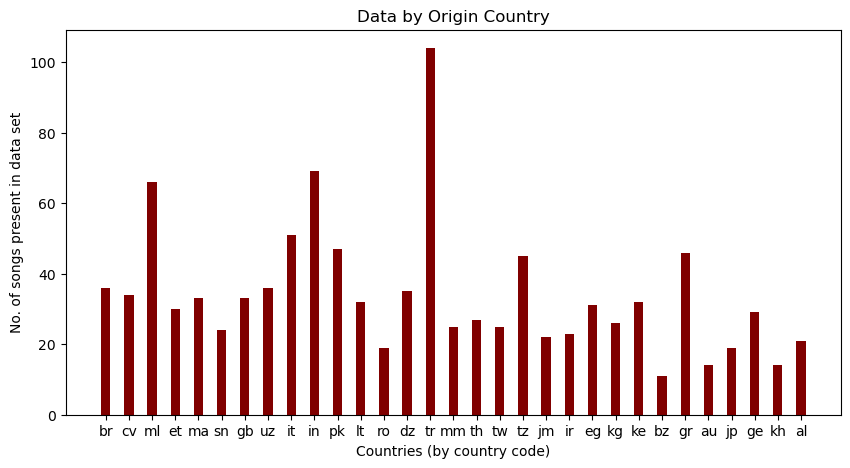

In [71]:
#plotting data

data = loc_dict

countries_list = list(data.keys())
counts = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(countries_list, counts, color ='maroon',
        width = 0.4)
 
plt.xlabel("Countries (by country code)")
plt.ylabel("No. of songs present in data set")
plt.title("Data by Origin Country")
plt.show()

In [72]:
most_common_matrix = np.zeros(train_y.shape)

for r in range(most_common_matrix.shape[0]):
    most_common_matrix[r, 23] = 1
    
print(most_common_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [73]:
result = testAccuracy(most_common_matrix)

print('Accuracy: {:.2f}%'.format(result))

Accuracy: 10.08%


In [74]:
cv_logits = regression_model(cv_x)
cv_prediction = tf.nn.softmax(cv_logits)
p = np.argmax(cv_prediction, axis=1)
cv_predict_matrix = np.zeros(cv_y.shape)
for r in range(cv_prediction.shape[0]):
    cv_predict_matrix[r, p[r]] = 1

In [75]:
test_logits = regression_model(test_x)
test_prediction = tf.nn.softmax(test_logits)
p = np.argmax(test_prediction, axis=1)
test_predict_matrix = np.zeros(test_y.shape)
for r in range(test_prediction.shape[0]):
    test_predict_matrix[r, p[r]] = 1

In [76]:
nn_cv_logits = nn_model(cv_x)
nn_cv_prediction = tf.nn.softmax(nn_cv_logits)
p = np.argmax(nn_cv_prediction, axis=1)
nn_cv_predict_matrix = np.zeros(cv_y.shape)
for r in range(nn_cv_prediction.shape[0]):
    nn_cv_predict_matrix[r, p[r]] = 1


In [77]:
nn_test_logits = nn_model(test_x)
nn_test_prediction = tf.nn.softmax(nn_test_logits)
p = np.argmax(nn_test_prediction, axis=1)
nn_test_predict_matrix = np.zeros(test_y.shape)
for r in range(nn_test_prediction.shape[0]):
    nn_test_predict_matrix[r, p[r]] = 1

In [78]:
most_common_matrix_cv = np.zeros(cv_y.shape)

for r in range(most_common_matrix_cv.shape[0]):
    most_common_matrix_cv[r, 23] = 1
    


In [79]:
most_common_matrix_test = np.zeros(test_y.shape)

for r in range(most_common_matrix_test.shape[0]):
    most_common_matrix_test[r, 23] = 1
    

In [80]:
random_matrix_cv = np.zeros(cv_y.shape)

for r in range(random_matrix_cv.shape[0]):
    label = randint(0, 32)
    random_matrix_cv[r, label] = 1

In [95]:
random_matrix_test = np.zeros(test_y.shape)

for r in range(random_matrix_test.shape[0]):
    label = randint(0, 32)
    random_matrix_test[r, label] = 1

In [96]:
result1 = testAccuracyCV(cv_predict_matrix)
result2 = testAccuracyTest(test_predict_matrix)
result3 = testAccuracyCV(nn_cv_predict_matrix)
result4 = testAccuracyTest(nn_test_predict_matrix)
result5 = testAccuracyCV(most_common_matrix_cv)
result6 = testAccuracyTest(most_common_matrix_test)
result7 = testAccuracyCV(random_matrix_cv)
result8 = testAccuracyTest(random_matrix_test)


print('CV Set Accuracy: {:.2f}%'.format(result1))
print('Test Set Accuracy: {:.2f}%'.format(result2))
print('NN CV Set Accuracy: {:.2f}%'.format(result3))
print('NN Test Set Accuracy: {:.2f}%'.format(result4))
print('Most Common CV Set Accuracy: {:.2f}%'.format(result5))
print('Most Common Test Set Accuracy: {:.2f}%'.format(result6))
print('Random CV Set Accuracy: {:.2f}%'.format(result7))
print('Random Test Set Accuracy: {:.2f}%'.format(result8))

CV Set Accuracy: 33.84%
Test Set Accuracy: 29.85%
NN CV Set Accuracy: 31.82%
NN Test Set Accuracy: 32.84%
Most Common CV Set Accuracy: 8.59%
Most Common Test Set Accuracy: 10.45%
Random CV Set Accuracy: 2.53%
Random Test Set Accuracy: 2.99%


In [83]:
train_results = []

for r in range(train_y.shape[0]):
    num_label = np.where(train_y[r] == 1)[0]
    train_results.append(num_label[0])

        
    
print(train_results)

[6, 16, 32, 7, 9, 28, 7, 22, 23, 17, 15, 15, 25, 9, 6, 7, 31, 32, 8, 23, 31, 10, 29, 12, 8, 22, 14, 32, 28, 12, 28, 32, 25, 1, 23, 22, 10, 17, 8, 15, 7, 31, 23, 7, 7, 12, 2, 30, 5, 23, 22, 20, 21, 27, 12, 0, 8, 23, 4, 7, 32, 2, 32, 1, 18, 30, 22, 11, 29, 31, 15, 2, 11, 28, 27, 10, 22, 16, 29, 14, 28, 7, 32, 17, 2, 15, 13, 26, 22, 7, 0, 19, 28, 17, 14, 21, 17, 0, 25, 28, 31, 0, 22, 13, 2, 8, 29, 30, 1, 29, 23, 31, 10, 31, 0, 22, 17, 18, 17, 23, 2, 2, 7, 7, 28, 28, 15, 7, 19, 27, 17, 14, 13, 29, 25, 7, 5, 17, 23, 7, 32, 26, 12, 13, 26, 8, 15, 30, 7, 23, 31, 7, 19, 16, 13, 15, 13, 8, 7, 15, 32, 7, 17, 18, 18, 22, 30, 17, 17, 9, 15, 32, 16, 15, 10, 1, 28, 4, 16, 28, 16, 28, 23, 31, 25, 26, 23, 22, 15, 32, 21, 27, 28, 1, 13, 4, 21, 14, 19, 23, 23, 22, 23, 22, 11, 1, 23, 1, 6, 18, 25, 13, 13, 32, 5, 21, 28, 23, 15, 23, 23, 32, 6, 1, 13, 17, 5, 1, 1, 32, 0, 2, 19, 16, 17, 12, 12, 2, 18, 31, 1, 0, 12, 14, 23, 8, 19, 0, 23, 9, 15, 4, 28, 17, 22, 19, 12, 15, 29, 9, 22, 23, 25, 22, 2, 4, 2, 22, 2

In [84]:
predict_results = []
predict_countries = countries.copy()
for r in range(predict_matrix.shape[0]):
    num_label = np.where(predict_matrix[r] == 1)[0]
    predict_results.append(num_label[0])

for i in range(33):
    if i not in predict_results and i not in train_results:
        country = countries[i]
        predict_countries.remove(country)
        
print(predict_results)
print(len(predict_countries))

[6, 16, 32, 7, 9, 28, 7, 22, 23, 17, 24, 15, 23, 9, 6, 7, 31, 32, 8, 24, 31, 10, 29, 12, 8, 28, 14, 32, 17, 12, 28, 32, 25, 1, 24, 22, 2, 17, 8, 15, 7, 31, 24, 7, 7, 12, 16, 30, 5, 24, 22, 20, 28, 27, 12, 0, 8, 17, 4, 7, 32, 3, 32, 1, 18, 30, 22, 11, 29, 31, 15, 2, 11, 1, 27, 10, 24, 17, 29, 14, 28, 7, 32, 17, 2, 15, 13, 26, 22, 7, 0, 19, 15, 17, 14, 21, 17, 0, 25, 23, 31, 0, 22, 13, 3, 8, 29, 30, 1, 29, 23, 31, 10, 31, 0, 22, 17, 18, 15, 23, 2, 10, 7, 7, 22, 24, 15, 7, 19, 27, 17, 14, 13, 29, 25, 7, 5, 17, 23, 7, 32, 26, 12, 13, 26, 8, 15, 30, 7, 16, 31, 7, 19, 16, 13, 15, 13, 8, 7, 15, 32, 7, 17, 18, 18, 22, 30, 17, 17, 9, 15, 32, 16, 17, 22, 1, 28, 4, 16, 25, 16, 24, 24, 31, 25, 26, 24, 22, 3, 32, 21, 27, 28, 1, 13, 4, 21, 14, 19, 23, 15, 10, 16, 22, 11, 1, 24, 1, 6, 18, 25, 13, 13, 32, 5, 21, 23, 24, 15, 24, 23, 32, 6, 23, 13, 17, 5, 1, 15, 32, 0, 2, 19, 16, 2, 12, 12, 24, 18, 31, 1, 0, 12, 14, 24, 8, 19, 0, 23, 9, 24, 4, 28, 17, 22, 19, 12, 15, 29, 9, 22, 16, 25, 22, 2, 4, 3, 22, 

In [85]:
nn_predict_results = []
nn_predict_countries = countries.copy()

for r in range(nn_predict_matrix.shape[0]):
    num_label = np.where(nn_predict_matrix[r] == 1)[0]
    nn_predict_results.append(num_label[0])
    
for i in range(33):
    if i not in nn_predict_results and i not in train_results:
        country = countries[i]
        nn_predict_countries.remove(country)
    
print(nn_predict_results)
print(len(nn_predict_countries))

[6, 17, 32, 7, 9, 22, 15, 23, 24, 17, 7, 15, 22, 9, 6, 7, 31, 29, 3, 23, 31, 28, 29, 12, 6, 22, 27, 23, 21, 12, 15, 32, 21, 1, 24, 22, 10, 23, 22, 24, 7, 31, 23, 7, 7, 12, 22, 15, 23, 24, 28, 3, 24, 27, 12, 0, 17, 23, 29, 7, 32, 2, 32, 1, 25, 22, 22, 29, 29, 31, 15, 13, 11, 21, 27, 24, 23, 17, 29, 27, 28, 7, 32, 25, 2, 15, 13, 18, 7, 7, 2, 2, 22, 17, 15, 21, 17, 1, 16, 23, 31, 0, 22, 13, 2, 15, 29, 22, 24, 29, 24, 31, 10, 31, 0, 22, 17, 17, 17, 23, 3, 3, 7, 7, 24, 24, 15, 23, 19, 27, 17, 15, 13, 32, 2, 7, 7, 17, 24, 7, 32, 15, 9, 13, 7, 24, 15, 21, 7, 23, 31, 7, 19, 16, 2, 15, 13, 15, 7, 24, 32, 7, 17, 23, 24, 24, 24, 17, 17, 18, 15, 32, 2, 17, 22, 17, 24, 29, 24, 28, 7, 3, 24, 31, 28, 26, 23, 22, 2, 32, 24, 27, 28, 18, 13, 29, 21, 32, 19, 23, 15, 22, 23, 28, 11, 1, 23, 21, 6, 2, 25, 13, 13, 32, 13, 21, 23, 23, 15, 23, 23, 32, 6, 28, 13, 17, 5, 0, 1, 32, 0, 2, 23, 32, 15, 21, 12, 23, 2, 31, 1, 0, 12, 32, 23, 19, 27, 15, 23, 9, 23, 13, 28, 17, 22, 28, 12, 15, 29, 23, 22, 24, 25, 22, 3, 

In [86]:
test_results = []


for r in range(test_y.shape[0]):
    num_label = np.where(test_y[r] == 1)[0]
    test_results.append(num_label[0])
    
print(test_results)

[7, 23, 30, 29, 15, 16, 20, 15, 31, 7, 31, 26, 2, 5, 10, 26, 15, 16, 17, 9, 23, 4, 9, 23, 31, 5, 7, 29, 27, 17, 23, 31, 28, 18, 23, 8, 2, 27, 19, 7, 17, 22, 4, 27, 2, 29, 19, 19, 18, 23, 4, 15, 20, 25, 15, 14, 8, 7, 7, 15, 22, 23, 18, 15, 7, 27, 32]


In [87]:
test_predict_results = []
test_predict_countries = countries.copy()
for r in range(test_predict_matrix.shape[0]):
    num_label = np.where(test_predict_matrix[r] == 1)[0]
    test_predict_results.append(num_label[0])
    
for i in range(33):
    if i not in test_predict_results and i not in test_results:
        country = countries[i]
        test_predict_countries.remove(country)
    
    
print(test_predict_results)
print(len(test_predict_countries))

[7, 7, 22, 29, 23, 31, 17, 15, 31, 17, 21, 25, 26, 3, 10, 15, 15, 21, 23, 5, 15, 3, 28, 28, 28, 5, 7, 2, 27, 25, 23, 3, 12, 15, 24, 8, 18, 27, 24, 0, 17, 24, 16, 13, 24, 21, 24, 13, 18, 24, 4, 24, 21, 4, 7, 4, 13, 9, 5, 23, 10, 28, 21, 15, 7, 27, 22]
30


In [88]:
nn_test_predict_results = []
nn_test_predict_countries = countries.copy()

for r in range(nn_test_predict_matrix.shape[0]):
    num_label = np.where(nn_test_predict_matrix[r] == 1)[0]
    nn_test_predict_results.append(num_label[0])
    
for i in range(33):
    if i not in nn_test_predict_results and i not in test_results:
        country = countries[i]
        nn_test_predict_countries.remove(country)
    
print(nn_test_predict_results)
print(len(nn_test_predict_countries))


[7, 23, 24, 29, 24, 23, 15, 15, 28, 7, 25, 15, 15, 7, 15, 15, 15, 21, 10, 7, 22, 13, 7, 22, 25, 22, 7, 16, 27, 15, 24, 31, 12, 15, 23, 3, 17, 27, 24, 0, 15, 22, 18, 16, 24, 29, 28, 7, 15, 23, 18, 15, 23, 23, 13, 28, 23, 7, 7, 15, 19, 24, 21, 15, 7, 23, 29]
30


In [89]:
confusion_matrix = skl.metrics.confusion_matrix(train_results, predict_results)
print(confusion_matrix)

[[14  0  0 ...  0  0  0]
 [ 0 19  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ... 13  0  0]
 [ 0  0  0 ...  0 26  0]
 [ 0  0  0 ...  0  0 25]]


In [90]:
confusion_matrix2 = skl.metrics.confusion_matrix(train_results, nn_predict_results)
print(confusion_matrix2)

[[ 9  1  1 ...  0  0  0]
 [ 1 13  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 21]]


In [91]:
confusion_matrix3 = skl.metrics.confusion_matrix(test_results, test_predict_results)
print(confusion_matrix3)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 3 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 3 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0

In [92]:
confusion_matrix4 = skl.metrics.confusion_matrix(test_results, nn_test_predict_results)
print(confusion_matrix4)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 5 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0

In [93]:
def plot_confusion_matrix(confusion_matrix, subtitle, country_list):
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, 1.0))
    ax.set_xticklabels(country_list, fontsize=8)
    ax.yaxis.set_ticks(np.arange(start, end, 1.0))
    ax.set_yticklabels(country_list, fontsize=8)
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(x=j, y=i,s=confusion_matrix[i, j], va='center', ha='center', size='small')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title(subtitle + ' Confusion Matrix', fontsize=12)
    plt.show()

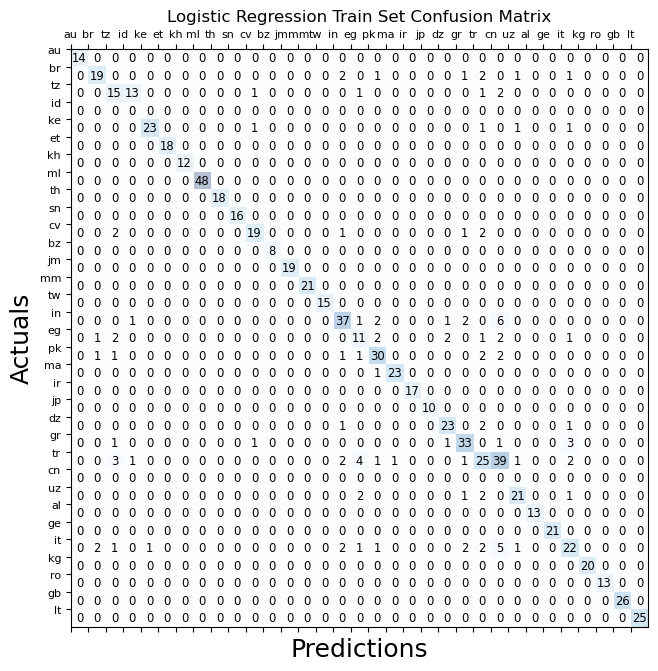

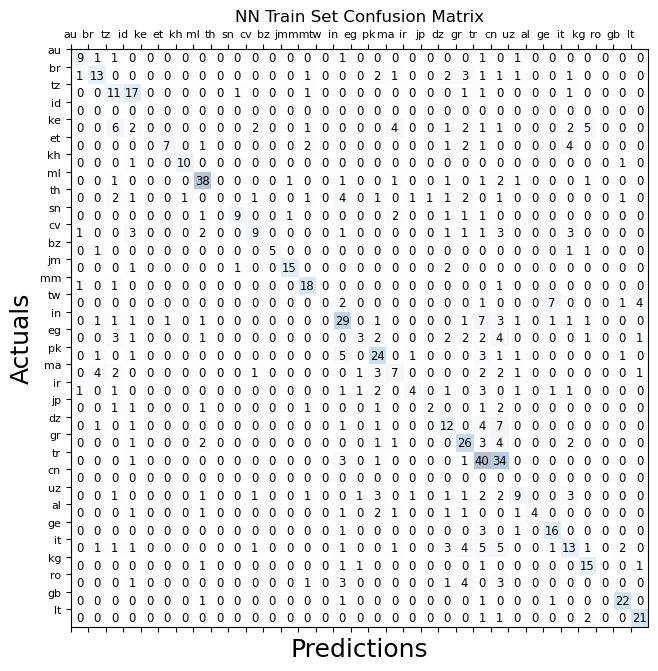

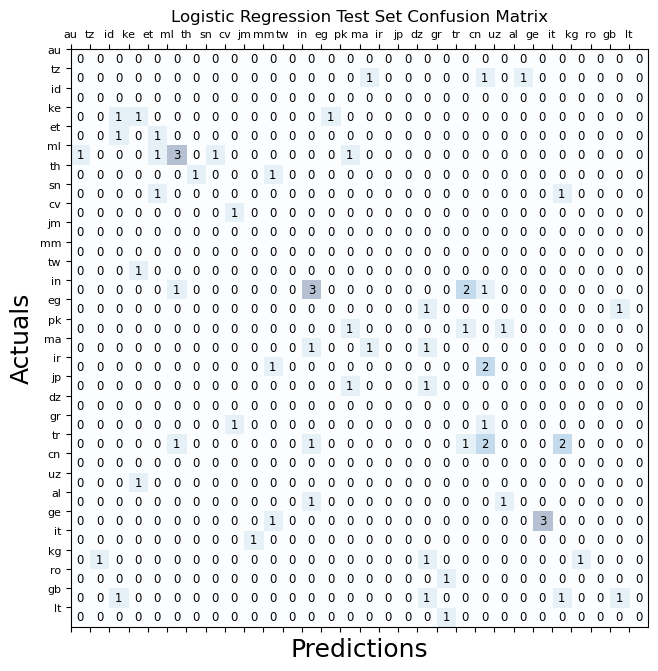

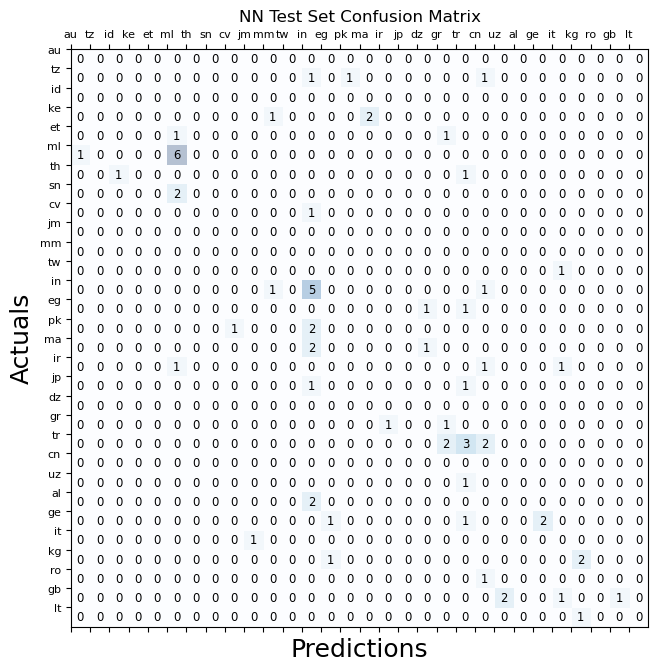

In [94]:
plot_confusion_matrix(confusion_matrix, "Logistic Regression Train Set", predict_countries)
plot_confusion_matrix(confusion_matrix2, "NN Train Set", nn_predict_countries)
plot_confusion_matrix(confusion_matrix3, "Logistic Regression Test Set", test_predict_countries)
plot_confusion_matrix(confusion_matrix4, "NN Test Set", nn_test_predict_countries)